### Pre-processing :
- 1.Word Count
- 2.Char Count
- 3.Avg Word Count
- 4.Stopwords Count
- 5.Upper_counts
- 6.Numeric_counts
- 7.Non_stop_words
- 8.Special Character Removal
- 9.Word Cloud
- 10.Exploratory Data Analysis - Distribution of Word count, Char count, Avg Word count, Non-stop words, Rare words, Top 20 - Unigram, Bigram, Tri-gram with Stopwords, Top 20 - Unigram, Bigram, Tri-gram without Stopwords, Top 20 Parts of Speech Tags Distribution 

In [ ]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

In [ ]:
url = "https://www.ramakrishnavivekananda.info/vivekananda/volume_1/karma-yoga/secret_of_work.htm"
html = urlopen(url).read()
soup = BeautifulSoup(html)
for script in soup(["script", "style"]):
  script.decompose() 

strips = list(soup.stripped_strings)
print(strips[13:]) 

["Helping\nothers physically, by removing their physical needs, is indeed great,\nbut the help is great according as the need is greater and according as\nthe help is far reaching. If a man's wants can be removed for an hour,\nit is helping him indeed; if his wants can be removed for a year, it\nwill be more help to him; but if his wants can be removed for ever, it\nis surely the greatest help that can be given him. Spiritual knowledge\nis the only thing that can destroy our miseries for ever; any other\nknowledge satisfies wants only for a time. It is only with the\nknowledge of the spirit that the faculty of want is annihilated for\never; so helping man spiritually is the highest help that can be given\nto him. He who gives man spiritual knowledge is the greatest benefactor\nof mankind and as such we always find that those were the most powerful\nof men who helped man in his spiritual needs, because spirituality is\nthe true basis of all our activities in life. A spiritually strong a

In [ ]:
text=strips[13:]

In [ ]:
text

["Helping\nothers physically, by removing their physical needs, is indeed great,\nbut the help is great according as the need is greater and according as\nthe help is far reaching. If a man's wants can be removed for an hour,\nit is helping him indeed; if his wants can be removed for a year, it\nwill be more help to him; but if his wants can be removed for ever, it\nis surely the greatest help that can be given him. Spiritual knowledge\nis the only thing that can destroy our miseries for ever; any other\nknowledge satisfies wants only for a time. It is only with the\nknowledge of the spirit that the faculty of want is annihilated for\never; so helping man spiritually is the highest help that can be given\nto him. He who gives man spiritual knowledge is the greatest benefactor\nof mankind and as such we always find that those were the most powerful\nof men who helped man in his spiritual needs, because spirituality is\nthe true basis of all our activities in life. A spiritually strong a

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame(text,columns=['Text'])
df.head(5)

,Text
0,"Helping\nothers physically, by removing their ..."
1,about permanent satisfaction. The misery that\...
2,The\nmiseries of the world cannot be cured by ...
3,We read in the\nBhagavad-Gita again and again ...
4,This is the one central idea in the Gita: work...


In [ ]:
df = df.replace('\n',' ', regex=True)
df.head(5)

,Text
0,"Helping others physically, by removing their p..."
1,about permanent satisfaction. The misery that ...
2,The miseries of the world cannot be cured by p...
3,We read in the Bhagavad-Gita again and again t...
4,This is the one central idea in the Gita: work...


In [ ]:
df.shape

(31, 1)

In [ ]:
df.describe()

,Text
count,31
unique,31
top,case we believe in a Personal God. Here we giv...
freq,1


### 2.Word Counts

In [ ]:
df['word_counts']=df['Text'].apply(lambda x:len(str(x).split()))

In [ ]:
df.head(5)

,Text,word_counts
0,"Helping others physically, by removing their p...",329
1,about permanent satisfaction. The misery that ...,72
2,The miseries of the world cannot be cured by p...,119
3,We read in the Bhagavad-Gita again and again t...,150
4,This is the one central idea in the Gita: work...,20


### 3.Char Counts

In [ ]:
def char_counts(x):
  s=x.split()
  print(s)
  x=''.join(s)
  print(x)
  return len(x)

In [ ]:
x='This is a new'

In [ ]:
char_counts(x)

['This', 'is', 'a', 'new']
Thisisanew


10

In [ ]:
def char_counts(x):
  s=x.split()
  x=''.join(s)
  return len(x)

In [ ]:
df['char_counts']=df['Text'].apply(lambda x: char_counts(str(x)))

In [ ]:
df.head(5)

,Text,word_counts,char_counts
0,"Helping others physically, by removing their p...",329,1455
1,about permanent satisfaction. The misery that ...,72,330
2,The miseries of the world cannot be cured by p...,119,545
3,We read in the Bhagavad-Gita again and again t...,150,657
4,This is the one central idea in the Gita: work...,20,83


### 4.Average Word Length

In [ ]:
df['avg_word_len']=df['char_counts']/df['word_counts']

In [ ]:
df.head(5)

,Text,word_counts,char_counts,avg_word_len
0,"Helping others physically, by removing their p...",329,1455,4.422492
1,about permanent satisfaction. The misery that ...,72,330,4.583333
2,The miseries of the world cannot be cured by p...,119,545,4.579832
3,We read in the Bhagavad-Gita again and again t...,150,657,4.380000
4,This is the one central idea in the Gita: work...,20,83,4.150000


### 5.Stopwords Length

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [ ]:
df['stop_words_len']=df['Text'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [ ]:
df.head(5)

,Text,word_counts,char_counts,avg_word_len,stop_words_len
0,"Helping others physically, by removing their p...",329,1455,4.422492,178
1,about permanent satisfaction. The misery that ...,72,330,4.583333,37
2,The miseries of the world cannot be cured by p...,119,545,4.579832,61
3,We read in the Bhagavad-Gita again and again t...,150,657,4.380000,81
4,This is the one central idea in the Gita: work...,20,83,4.150000,11


### 6.Upper Counts

In [ ]:
df['upper_counts']=df['Text'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [ ]:
df.head(5)

,Text,word_counts,char_counts,avg_word_len,stop_words_len,upper_counts
0,"Helping others physically, by removing their p...",329,1455,4.422492,178,1
1,about permanent satisfaction. The misery that ...,72,330,4.583333,37,3
2,The miseries of the world cannot be cured by p...,119,545,4.579832,61,0
3,We read in the Bhagavad-Gita again and again t...,150,657,4.380000,81,0
4,This is the one central idea in the Gita: work...,20,83,4.150000,11,0


### 7.Lowering the Text

In [ ]:
df['Text']=df['Text'].apply(lambda x: str(x).lower())

In [ ]:
df.head(5)

,Text,word_counts,char_counts,avg_word_len,stop_words_len,upper_counts
0,"helping others physically, by removing their p...",329,1455,4.422492,178,1
1,about permanent satisfaction. the misery that ...,72,330,4.583333,37,3
2,the miseries of the world cannot be cured by p...,119,545,4.579832,61,0
3,we read in the bhagavad-gita again and again t...,150,657,4.380000,81,0
4,this is the one central idea in the gita: work...,20,83,4.150000,11,0


In [ ]:
# df = df.drop(['lower_counts'],axis=1)

In [ ]:
# df.head(5)

,Text,word_counts,char_counts,avg_word_len,stop_words_len,upper_counts
0,"helping others physically, by removing their p...",329,1455,4.422492,178,1
1,about permanent satisfaction. the misery that ...,72,330,4.583333,37,3
2,the miseries of the world cannot be cured by p...,119,545,4.579832,61,0
3,we read in the bhagavad-gita again and again t...,150,657,4.380000,81,0
4,this is the one central idea in the gita: work...,20,83,4.150000,11,0


### Special Character Removal

In [ ]:
import re
df['Text']=df['Text'].apply(lambda x:re.sub(r'[^\w ]+','',x))

In [ ]:
df.head(5)

,Text,word_counts,char_counts,avg_word_len,stop_words_len,upper_counts
0,helping others physically by removing their ph...,329,1455,4.422492,178,1
1,about permanent satisfaction the misery that i...,72,330,4.583333,37,3
2,the miseries of the world cannot be cured by p...,119,545,4.579832,61,0
3,we read in the bhagavadgita again and again th...,150,657,4.380000,81,0
4,this is the one central idea in the gita work ...,20,83,4.150000,11,0


In [ ]:
df['numeric_counts']=df['Text'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [ ]:
df.head(5)

,Text,word_counts,char_counts,avg_word_len,stop_words_len,upper_counts,numeric_counts
0,helping others physically by removing their ph...,329,1455,4.422492,178,1,0
1,about permanent satisfaction the misery that i...,72,330,4.583333,37,3,0
2,the miseries of the world cannot be cured by p...,119,545,4.579832,61,0,0
3,we read in the bhagavadgita again and again th...,150,657,4.380000,81,0,0
4,this is the one central idea in the gita work ...,20,83,4.150000,11,0,0


### Non-Stopwords Count

In [ ]:
df['non_stop_words'] = df['Text'].apply(lambda x: len([t for t in x.split() if t not in stopwords]))

In [ ]:
df.head(5)

,Text,word_counts,char_counts,avg_word_len,stop_words_len,upper_counts,numeric_counts,non_stop_words
0,helping others physically by removing their ph...,329,1455,4.422492,178,1,0,132
1,about permanent satisfaction the misery that i...,72,330,4.583333,37,3,0,28
2,the miseries of the world cannot be cured by p...,119,545,4.579832,61,0,0,51
3,we read in the bhagavadgita again and again th...,150,657,4.380000,81,0,0,57
4,this is the one central idea in the gita work ...,20,83,4.150000,11,0,0,7


### Rare Words 

In [ ]:
text = df['Text'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

In [ ]:
text = ''.join(text)

In [ ]:
text

'helping physically removing physical needs great help great according need greater according help far reaching mans wants removed hour helping wants removed year help wants removed surely greatest help given spiritual knowledge thing destroy miseries knowledge satisfies wants time knowledge spirit faculty want annihilated helping man spiritually highest help given gives man spiritual knowledge greatest benefactor mankind find powerful men helped man spiritual needs spirituality true basis activities life spiritually strong sound man strong respect wishes spiritual strength man physical needs satisfied spiritual comes intellectual help gift knowledge far higher gift food clothes higher giving life man real life man consists knowledge ignorance death knowledge life life little value life dark groping ignorance misery order comes course helping man physically considering question helping strive commit mistake thinking physical help help given bringpermanent satisfaction misery feel hungr

In [ ]:
len(text)

9966

In [ ]:
text=text.split()
len(text)

1403

In [ ]:
text

['helping',
 'physically',
 'removing',
 'physical',
 'needs',
 'great',
 'help',
 'great',
 'according',
 'need',
 'greater',
 'according',
 'help',
 'far',
 'reaching',
 'mans',
 'wants',
 'removed',
 'hour',
 'helping',
 'wants',
 'removed',
 'year',
 'help',
 'wants',
 'removed',
 'surely',
 'greatest',
 'help',
 'given',
 'spiritual',
 'knowledge',
 'thing',
 'destroy',
 'miseries',
 'knowledge',
 'satisfies',
 'wants',
 'time',
 'knowledge',
 'spirit',
 'faculty',
 'want',
 'annihilated',
 'helping',
 'man',
 'spiritually',
 'highest',
 'help',
 'given',
 'gives',
 'man',
 'spiritual',
 'knowledge',
 'greatest',
 'benefactor',
 'mankind',
 'find',
 'powerful',
 'men',
 'helped',
 'man',
 'spiritual',
 'needs',
 'spirituality',
 'true',
 'basis',
 'activities',
 'life',
 'spiritually',
 'strong',
 'sound',
 'man',
 'strong',
 'respect',
 'wishes',
 'spiritual',
 'strength',
 'man',
 'physical',
 'needs',
 'satisfied',
 'spiritual',
 'comes',
 'intellectual',
 'help',
 'gift',
 'kn

In [ ]:
rare_words = pd.Series(text).value_counts()

In [ ]:
rare_words

work            49
good            27
man             25
love            23
mind            16
                ..
occasion         1
aspects          1
forms            1
door             1
renunciation     1
Length: 678, dtype: int64

### Word Cloud

In [ ]:
w_c_text = ' '.join(df['Text'].tolist())

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

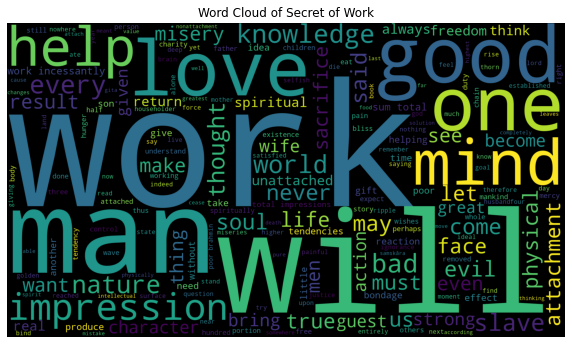

In [ ]:
wordcloud = WordCloud(width=1920,height=1080).generate(w_c_text)
plt.figure(figsize=(10,10))
plt.title('Word Cloud of Secret of Work')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Text            31 non-null     object 
 1   word_counts     31 non-null     int64  
 2   char_counts     31 non-null     int64  
 3   avg_word_len    31 non-null     float64
 4   stop_words_len  31 non-null     int64  
 5   upper_counts    31 non-null     int64  
 6   numeric_counts  31 non-null     int64  
 7   non_stop_words  31 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.1+ KB


In [ ]:
df['word_counts'][:5]

0    329
1     72
2    119
3    150
4     20
Name: word_counts, dtype: int64

Data Visualization : Word Length, Char Length, Average Word Length, Non- Stop-words,Rare Words


In [ ]:
import plotly.express as px
fig = px.histogram(df, x=df['word_counts'], nbins=15,color_discrete_sequence=['turquoise'])
                   
fig.update_layout(xaxis_title_text='Word Length', yaxis_title_text='Count', title_text='Word Length Distribution')

fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df, x=df['char_counts'], nbins=15,color_discrete_sequence=['turquoise'])
                   
fig.update_layout(xaxis_title_text='Character Count', yaxis_title_text='Count', title_text='Character Length Distribution')

fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df, x=df['avg_word_len'], nbins=15,color_discrete_sequence=['turquoise'])
                   
fig.update_layout(xaxis_title_text='Average Word Length', yaxis_title_text='Count', title_text='Average Word Length Distribution')

fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df, x=df['non_stop_words'], nbins=12,color_discrete_sequence=['turquoise'])
                   
fig.update_layout(xaxis_title_text='Non-Stop Words', yaxis_title_text='Count', title_text='Non-Stop Words Length Distribution')

fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df, x=top_rare_words, nbins=5,color_discrete_sequence=['turquoise'])
                   
fig.update_layout(xaxis_title_text='Rare Words', yaxis_title_text='Count', title_text='Top 20 Rare Words Length Distribution')

fig.show()

In [ ]:
rare_words[:20]

work           49
good           27
man            25
love           23
mind           16
help           15
knowledge      14
bad            14
world          13
impressions    13
nature         12
said           10
evil           10
attachment      9
soul            9
life            9
let             9
true            9
physical        9
poor            8
dtype: int64

In [ ]:
import plotly.graph_objects as go    
fig = go.Figure([go.Bar(x=['work' ,'good', 'man', 'love', 'mind',
                           'help','knowledge', 'bad' ,'world' ,'impressions', 'nature', 'said' ,
                           'evil', 'attachment' ,'soul' ,'life','let','true','physcial','poor'],
                        y =[49, 27, 25, 23, 16, 15, 14, 14, 13, 13, 
                            12, 10, 10, 9, 9, 9, 9, 9, 9,8],             
                        marker_color='crimson')])
fig.update_layout(xaxis_title='Rare words', yaxis_title='Count',title_text='Top 20 Rare Words Distribution')

fig.show()

### Unigram, Bi-gram, Tri-gram with Stopwords Distribution

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def get_top_n_words(x,n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(words, sum_words[0, idx]) for words, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x:x[1], reverse=True ) # here x is word frequency
    return words_freq[:n]

In [ ]:
words = get_top_n_words(df['Text'],20)

In [ ]:
words

[('the', 237),
 ('of', 128),
 ('and', 124),
 ('is', 111),
 ('to', 89),
 ('that', 60),
 ('in', 58),
 ('work', 51),
 ('be', 50),
 ('it', 48),
 ('we', 44),
 ('for', 42),
 ('as', 37),
 ('will', 37),
 ('not', 37),
 ('but', 31),
 ('this', 31),
 ('all', 28),
 ('there', 28),
 ('you', 28)]

In [ ]:
df2 = pd.DataFrame(words, columns=['Unigram','Frequency'])

In [ ]:
df2

,Unigram,Frequency
0,the,237
1,of,128
2,and,124
3,is,111
4,to,89
5,that,60
6,in,58
7,work,51
8,be,50
9,it,48


In [ ]:
df2['Frequency'].tolist()

[237,
 128,
 124,
 111,
 89,
 60,
 58,
 51,
 50,
 48,
 44,
 42,
 37,
 37,
 37,
 31,
 31,
 28,
 28,
 28]

In [ ]:
import plotly.express as px
fig = px.bar(
             x=df2['Unigram'],
        
            y=df2['Frequency'])

fig.update_layout(xaxis_title_text='Unigram', yaxis_title_text='Count', title_text='Top20 Unigram Distribution')

fig.show()

### Top20 Bigram Distribution

In [ ]:
def get_top_n_words(x,n):
    vec = CountVectorizer(ngram_range=(2,2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(words, sum_words[0, idx]) for words, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x:x[1], reverse=True ) # here x is word frequency
    return words_freq[:n]

In [ ]:
words = get_top_n_words(df['Text'],20)
words

[('of the', 28),
 ('it is', 19),
 ('is the', 15),
 ('there is', 13),
 ('in the', 13),
 ('to the', 13),
 ('the world', 11),
 ('the mind', 11),
 ('on the', 11),
 ('can be', 10),
 ('will be', 10),
 ('all the', 9),
 ('the soul', 9),
 ('we are', 8),
 ('for the', 8),
 ('to be', 8),
 ('as the', 7),
 ('will not', 7),
 ('so the', 7),
 ('and the', 7)]

In [ ]:
df2 = pd.DataFrame(words, columns=['Bigram','Frequency'])
df2

,Bigram,Frequency
0,of the,28
1,it is,19
2,is the,15
3,there is,13
4,in the,13
5,to the,13
6,the world,11
7,the mind,11
8,on the,11
9,can be,10


In [ ]:
fig = px.bar(
             x=df2['Bigram'],
        
            y=df2['Frequency'])

fig.update_layout(xaxis_title_text='Bigram', yaxis_title_text='Count', title_text='Top20 Bigram Distribution')
fig.show()

### Top20 Trigram Distribution

In [ ]:
def get_top_n_words(x,n):
    vec = CountVectorizer(ngram_range=(3,3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(words, sum_words[0, idx]) for words, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x:x[1], reverse=True ) # here x is word frequency
    return words_freq[:n]

In [ ]:
words = get_top_n_words(df['Text'],20)
words

[('the sum total', 6),
 ('sum total of', 6),
 ('of the world', 4),
 ('work incessantly but', 4),
 ('impression on the', 4),
 ('total of these', 4),
 ('of these impressions', 4),
 ('on the mind', 4),
 ('him to do', 4),
 ('there is no', 4),
 ('wants can be', 3),
 ('can be removed', 3),
 ('be removed for', 3),
 ('help that can', 3),
 ('that can be', 3),
 ('can be given', 3),
 ('of all the', 3),
 ('good and evil', 3),
 ('of the soul', 3),
 ('the work we', 3)]

In [ ]:
df2 = pd.DataFrame(words, columns=['Trigram','Frequency'])
df2

,Trigram,Frequency
0,the sum total,6
1,sum total of,6
2,of the world,4
3,work incessantly but,4
4,impression on the,4
5,total of these,4
6,of these impressions,4
7,on the mind,4
8,him to do,4
9,there is no,4


In [ ]:
fig = px.bar(
             x=df2['Trigram'],
        
            y=df2['Frequency'])

fig.update_layout(xaxis_title_text='Trigram', yaxis_title_text='Count', title_text='Top20 Trigram Distribution')
fig.show()

### Unigram, Bi-gram,Tri-gram without Stopwords

In [ ]:
def get_top_n_words(x,n):
    vec = CountVectorizer(ngram_range=(1,1), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(words, sum_words[0, idx]) for words, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x:x[1], reverse=True ) # here x is word frequency
    return words_freq[:n]

In [ ]:
words = get_top_n_words(df['Text'],20)
words

[('work', 51),
 ('good', 27),
 ('man', 25),
 ('love', 24),
 ('mind', 17),
 ('help', 16),
 ('knowledge', 14),
 ('bad', 14),
 ('world', 13),
 ('impressions', 13),
 ('nature', 12),
 ('evil', 10),
 ('soul', 10),
 ('said', 10),
 ('physical', 9),
 ('true', 9),
 ('life', 9),
 ('let', 9),
 ('attachment', 9),
 ('misery', 8)]

In [ ]:
df2 = pd.DataFrame(words, columns=['Unigram','Frequency'])
df2

,Unigram,Frequency
0,work,51
1,good,27
2,man,25
3,love,24
4,mind,17
5,help,16
6,knowledge,14
7,bad,14
8,world,13
9,impressions,13


In [ ]:
fig = px.bar(
             x=df2['Unigram'],
        
            y=df2['Frequency'],color_discrete_sequence=['purple'])
fig.update_layout(xaxis_title_text='Unigram', yaxis_title_text='Count', title_text='Top20 Unigram w/o stopwords Distribution')
fig.show()

### Top20 Bigram w/o stopwords Distribution

In [ ]:
def get_top_n_words(x,n):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(words, sum_words[0, idx]) for words, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x:x[1], reverse=True ) # here x is word frequency
    return words_freq[:n]

In [ ]:
words = get_top_n_words(df['Text'],20)
words

[('work incessantly', 6),
 ('sum total', 6),
 ('total impressions', 5),
 ('physical help', 4),
 ('physical needs', 3),
 ('wants removed', 3),
 ('help given', 3),
 ('good evil', 3),
 ('bad impressions', 3),
 ('good thoughts', 3),
 ('deep impression', 3),
 ('work work', 3),
 ('like slaves', 3),
 ('work like', 3),
 ('true love', 3),
 ('things world', 3),
 ('true work', 3),
 ('love does', 3),
 ('poor brahmin', 3),
 ('spiritual knowledge', 2)]

In [ ]:
df2 = pd.DataFrame(words, columns=['Bigram','Frequency'])
df2

,Bigram,Frequency
0,work incessantly,6
1,sum total,6
2,total impressions,5
3,physical help,4
4,physical needs,3
5,wants removed,3
6,help given,3
7,good evil,3
8,bad impressions,3
9,good thoughts,3


In [ ]:
fig = px.bar(
             x=df2['Bigram'],
        
            y=df2['Frequency'],color_discrete_sequence=['coral'])

fig.update_layout(xaxis_title_text='Bigram', yaxis_title_text='Count', title_text='Top20 Bigram w/o stopwords Distribution')

fig.show()

### Top20 Trigram w/o Stopword Distribution

In [ ]:
def get_top_n_words(x,n):
    vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(words, sum_words[0, idx]) for words, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x:x[1], reverse=True ) # here x is word frequency
    return words_freq[:n]

In [ ]:
words = get_top_n_words(df['Text'],20)
words

[('sum total impressions', 5),
 ('comes intellectual help', 2),
 ('determined sum total', 2),
 ('total impressions good', 2),
 ('deep impression soul', 2),
 ('work true work', 2),
 ('helping physically removing', 1),
 ('physically removing physical', 1),
 ('removing physical needs', 1),
 ('physical needs great', 1),
 ('needs great help', 1),
 ('great help great', 1),
 ('help great according', 1),
 ('great according need', 1),
 ('according need greater', 1),
 ('need greater according', 1),
 ('greater according help', 1),
 ('according help far', 1),
 ('help far reaching', 1),
 ('far reaching mans', 1)]

In [ ]:
df2 = pd.DataFrame(words, columns=['Trigram','Frequency'])
df2

,Trigram,Frequency
0,sum total impressions,5
1,comes intellectual help,2
2,determined sum total,2
3,total impressions good,2
4,deep impression soul,2
5,work true work,2
6,helping physically removing,1
7,physically removing physical,1
8,removing physical needs,1
9,physical needs great,1


In [ ]:
fig = px.bar(
             x=df2['Trigram'],
        
            y=df2['Frequency'],color_discrete_sequence=['lime'])
fig.update_layout(xaxis_title_text='Trigram', yaxis_title_text='Count', title_text='Top20 Trigram w/o stopwords Distribution')
fig.show()

### Top 20 Parts of Speech Tags Distribution

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
blob = TextBlob(str(df['Text']))

In [ ]:
blob

TextBlob("0     helping others physically by removing their ph...
1     about permanent satisfaction the misery that i...
2     the miseries of the world cannot be cured by p...
3     we read in the bhagavadgita again and again th...
4     this is the one central idea in the gita work ...
5     translated very nearly by inherent tendency us...
6     back he is completely under the influence of t...
7     as the tortoise tucks its feet and head inside...
8     have also to be conquered thus the attached be...
9     how can this be done we see that the impressio...
10    therefore be unattached let things work let br...
11    sânkhya the whole of nature is for the soul no...
12    the whole gist of this teaching is that you sh...
13                                               master
14                                         and not as a
15                                                slave
16     work incessantly but do not do slaves work do...
17    its reaction real existence real

In [ ]:
blob.tags

[('0', 'CD'),
 ('helping', 'VBG'),
 ('others', 'NNS'),
 ('physically', 'RB'),
 ('by', 'IN'),
 ('removing', 'VBG'),
 ('their', 'PRP$'),
 ('ph', 'NN'),
 ('1', 'CD'),
 ('about', 'IN'),
 ('permanent', 'JJ'),
 ('satisfaction', 'NN'),
 ('the', 'DT'),
 ('misery', 'NN'),
 ('that', 'IN'),
 ('i', 'NN'),
 ('2', 'CD'),
 ('the', 'DT'),
 ('miseries', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('can', 'MD'),
 ('not', 'RB'),
 ('be', 'VB'),
 ('cured', 'VBN'),
 ('by', 'IN'),
 ('p', 'NN'),
 ('3', 'CD'),
 ('we', 'PRP'),
 ('read', 'VBP'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('bhagavadgita', 'NN'),
 ('again', 'RB'),
 ('and', 'CC'),
 ('again', 'RB'),
 ('th', 'NNS'),
 ('4', 'CD'),
 ('this', 'DT'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('one', 'CD'),
 ('central', 'JJ'),
 ('idea', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('gita', 'JJ'),
 ('work', 'NN'),
 ('5', 'CD'),
 ('translated', 'VBD'),
 ('very', 'RB'),
 ('nearly', 'RB'),
 ('by', 'IN'),
 ('inherent', 'JJ'),
 ('tendency', 'NN'),
 ('us', 'PRP'),
 ('6', 'C

In [ ]:
nltk.download('tagsets')

In [ ]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [ ]:
pos_df = pd.DataFrame(blob.tags, columns=['words','pos'])

In [ ]:
pos_df1 = pos_df['pos'].value_counts()
pos_df1

NN      51
IN      35
CD      32
DT      29
RB      21
JJ      18
VBP     14
VBZ     14
PRP     12
VB      12
NNS     10
CC       6
PRP$     4
VBG      4
TO       3
VBN      3
MD       3
VBD      2
WDT      1
EX       1
WRB      1
WP       1
Name: pos, dtype: int64

In [ ]:
pos_df['pos'][:]

0       CD
1      VBG
2      NNS
3       RB
4       IN
      ... 
272     NN
273     NN
274     NN
275     NN
276     NN
Name: pos, Length: 277, dtype: object

In [ ]:
import plotly.graph_objects as go    
fig = go.Figure([go.Bar(x=['NN','IN','CD','DT','RB','JJ','VBP','VBZ','PRP','VB','NNS','CC','PRP$','VBG','TO','VBN','MD','VBD','WDT','EX','WRB','WP'],
                        y =[51,35,32,29,21,18,14,14,12,12,10,6.4,4,3,3,3,2,1,1,1,1],             
                        marker_color='crimson')])
fig.update_layout(xaxis_title='POS', yaxis_title='Count',title_text='Top 20 POS Distribution')

fig.show()

Useful Links :
- https://www.kite.com/python/answers/how-to-extract-text-from-an-html-file-in-python

- https://www.kaggle.com/roydatascience/extracting-text-from-html-file-using-python